<a href="https://colab.research.google.com/github/salahagnir/CA/blob/main/Machine_learning_for_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CA MSc/Estimated Migration.csv')

df.head(5)

,STATISTIC Label,Year,Age Group,Sex,Inward or Outward Flow,UNIT,VALUE
0,Estimated Migration (Persons in April),1987,All ages,Both sexes,Net migration,Thousand,-23.0
1,Estimated Migration (Persons in April),1987,All ages,Both sexes,Emigrants: All destinations,Thousand,40.2
2,Estimated Migration (Persons in April),1987,All ages,Both sexes,Immigrants: All origins,Thousand,17.2
3,Estimated Migration (Persons in April),1987,All ages,Male,Net migration,Thousand,NaN
4,Estimated Migration (Persons in April),1987,All ages,Male,Emigrants: All destinations,Thousand,NaN


In [ ]:
df.head(5)

,STATISTIC Label,Year,Age Group,Sex,Inward or Outward Flow,UNIT,VALUE
0,Estimated Migration (Persons in April),1987,All ages,Both sexes,Net migration,Thousand,-23.0
1,Estimated Migration (Persons in April),1987,All ages,Both sexes,Emigrants: All destinations,Thousand,40.2
2,Estimated Migration (Persons in April),1987,All ages,Both sexes,Immigrants: All origins,Thousand,17.2
3,Estimated Migration (Persons in April),1987,All ages,Male,Net migration,Thousand,NaN
4,Estimated Migration (Persons in April),1987,All ages,Male,Emigrants: All destinations,Thousand,NaN


<ipython-input-58-0ad262a5efbf>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c= df.corr()


,Year,VALUE
Year,1.000000,0.162118
VALUE,0.162118,1.000000


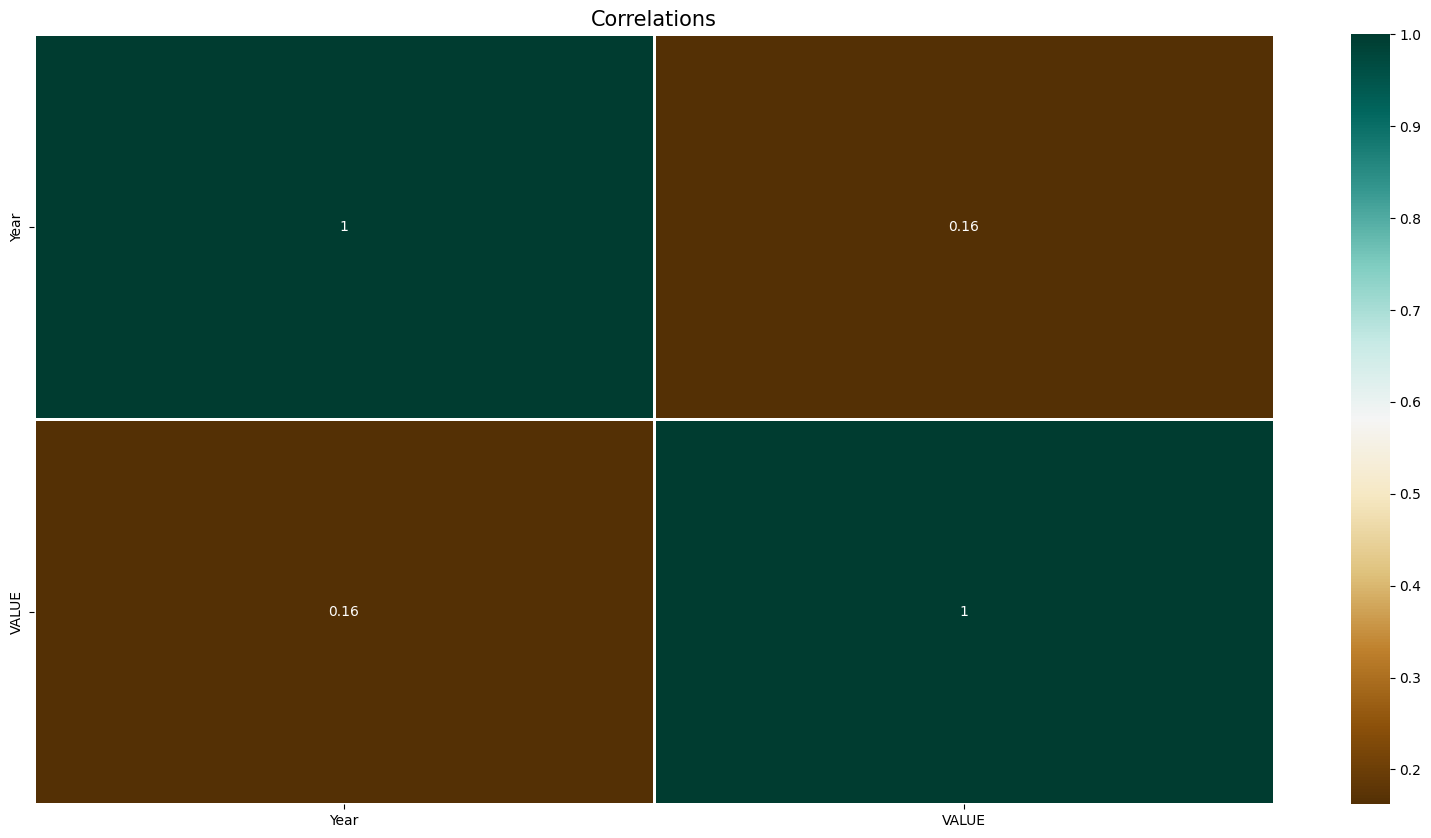

In [ ]:
# Heatmap constructed to visualise correlation of numerical features.
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True, linewidth=1)
plt.title('Correlations', fontsize=15)
c

In [ ]:
df = df.fillna(0)

In [ ]:
#df['VALUE'] = np.maximum(df['VALUE'], 0)

In [ ]:
df=df.drop(["STATISTIC Label","UNIT"],axis=1)

In [ ]:
# Encode categorical variables
df = pd.get_dummies(df, columns=['Age Group', 'Sex', 'Inward or Outward Flow'])

In [ ]:
df.head(5)


,STATISTIC Label,Year,UNIT,VALUE,Age Group_0 - 14 years,Age Group_15 - 24 years,Age Group_25 - 44 years,Age Group_45 - 64 years,Age Group_65 years and over,Age Group_All ages,Sex_Both sexes,Sex_Female,Sex_Male,Inward or Outward Flow_Emigrants: All destinations,Inward or Outward Flow_Immigrants: All origins,Inward or Outward Flow_Net migration
0,Estimated Migration (Persons in April),1987,Thousand,-23.0,0,0,0,0,0,1,1,0,0,0,0,1
1,Estimated Migration (Persons in April),1987,Thousand,40.2,0,0,0,0,0,1,1,0,0,1,0,0
2,Estimated Migration (Persons in April),1987,Thousand,17.2,0,0,0,0,0,1,1,0,0,0,1,0
3,Estimated Migration (Persons in April),1987,Thousand,NaN,0,0,0,0,0,1,0,0,1,0,0,1
4,Estimated Migration (Persons in April),1987,Thousand,NaN,0,0,0,0,0,1,0,0,1,1,0,0


In [ ]:
# Split the data into features (X) and target (y)
X = df.drop('VALUE', axis=1)
y = df['VALUE']

In [ ]:
# Split the data set into Training and Testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [ ]:
# Model 1: Linear Regression


In [ ]:
# Create and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the testing set
y_test_pred = model.predict(X_test)

In [ ]:
# Create a DataFrame to compare actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

In [ ]:
# Print the combined DataFrame
print(results)

      Actual  Predicted
405      0.0   9.891411
1189    72.0  34.152000
674      9.2   9.123920
1358    29.7  31.241340
810     41.3  26.203014
...      ...        ...
1898    58.6  35.087243
1522    11.4  13.046518
1413    -3.5   7.020483
1222    15.5  12.373516
1765     3.4  13.627939

[500 rows x 2 columns]


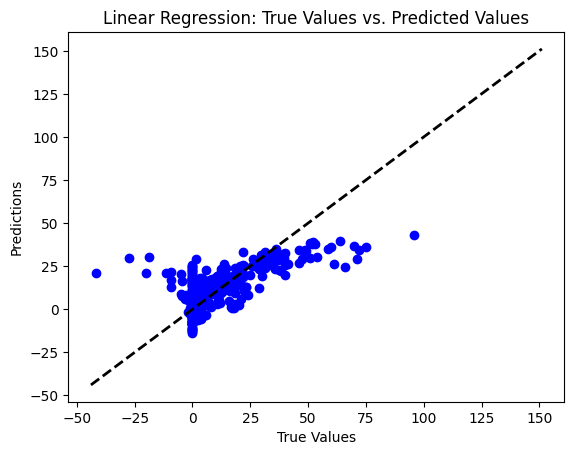

In [ ]:
# Create a scatter plot to visualize the results
plt.scatter(y_test, y_test_pred, color='blue')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression: True Values vs. Predicted Values')

# Add a diagonal line for reference
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)

plt.show()

In [ ]:
#Model 2 : Random Forest Regression
# Create and train a RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Make predictions on the training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
# Make predictions on the testing set
y_test_pred = model.predict(X_test)

In [ ]:
# Combine actual and predicted values into a DataFrame
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

In [ ]:
# Print the combined DataFrame
print(results)

      Actual  Predicted
405      0.0      0.000
1189    72.0     63.686
674      9.2      7.902
1358    29.7     27.869
810     41.3     33.942
...      ...        ...
1898    58.6     43.607
1522    11.4      7.612
1413    -3.5     -0.065
1222    15.5     14.058
1765     3.4      3.934

[500 rows x 2 columns]


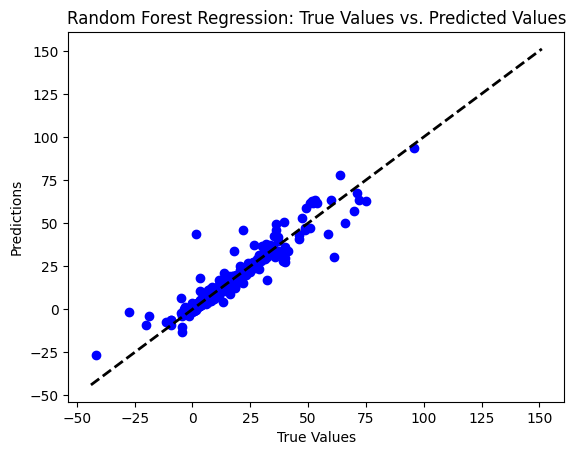

In [ ]:
# Make predictions on the testing set
y_test_pred = model.predict(X_test)

# Create a scatter plot to visualize the results
plt.scatter(y_test, y_test_pred, color='blue')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Random Forest Regression: True Values vs. Predicted Values')

# Add a diagonal line for reference
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)

plt.show()

In [ ]:
# Model 3: Gradient Boosting Regression
# Create and train a Gradient Boosting Regression model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:

# Make predictions on the testing set
y_test_pred = model.predict(X_test)

In [ ]:
# Make predictions on the testing set
y_test_pred = model.predict(X_test)

In [ ]:

# Create a DataFrame to compare actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

In [ ]:
# Print the combined DataFrame
print(results)

      Actual  Predicted
405      0.0   2.760876
1189    72.0  56.605417
674      9.2   8.235756
1358    29.7  35.055649
810     41.3  21.411981
...      ...        ...
1898    58.6  54.440741
1522    11.4   9.857647
1413    -3.5  -3.488049
1222    15.5  13.926488
1765     3.4   6.272759

[500 rows x 2 columns]


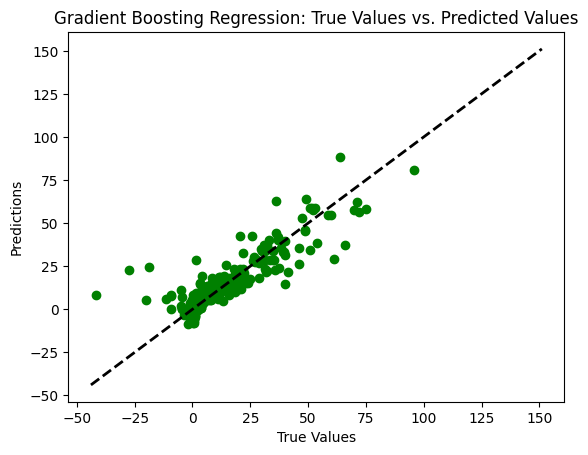

In [ ]:
# Create a scatter plot to visualize the results
plt.scatter(y_test, y_test_pred, color='green')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Gradient Boosting Regression: True Values vs. Predicted Values')

# Add a diagonal line for reference
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)

plt.show()

In [ ]:
# Model 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [ ]:
# Model 2: Random Forest Regression
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [ ]:
# Model 3: Gradient Boosting Regression
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

In [ ]:
# Evaluate the models
mae_lr = mean_absolute_error(y_test, lr_pred)
mse_lr = mean_squared_error(y_test, lr_pred)
r2_lr = r2_score(y_test, lr_pred)

mae_rf = mean_absolute_error(y_test, rf_pred)
mse_rf = mean_squared_error(y_test, rf_pred)
r2_rf = r2_score(y_test, rf_pred)

mae_gb = mean_absolute_error(y_test, gb_pred)
mse_gb = mean_squared_error(y_test, gb_pred)
r2_gb = r2_score(y_test, gb_pred)

In [ ]:
# Create a bar chart to compare model performances
metrics = ['MAE', 'MSE', 'R-squared']
lr_metrics = [mae_lr, mse_lr, r2_lr]
rf_metrics = [mae_rf, mse_rf, r2_rf]
gb_metrics = [mae_gb, mse_gb, r2_gb]

x = np.arange(len(metrics))
width = 0.2

In [ ]:

# Create a DataFrame to store the metrics for each model
results_df = pd.DataFrame({
    'Metric': metrics,
    'Linear Regression': lr_metrics,
    'Random Forest Regression': rf_metrics,
    'Gradient Boosting Regression': gb_metrics
})

# Print the results
print(results_df)

      Metric  Linear Regression  Random Forest Regression  \
0        MAE           7.599749                  1.909654   
1        MSE         124.036900                 17.208845   
2  R-squared           0.439977                  0.922303   

   Gradient Boosting Regression  
0                      3.787707  
1                     46.630096  
2                      0.789466  


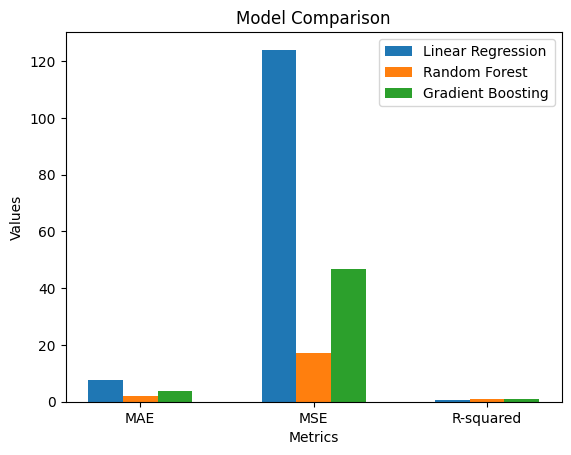

In [ ]:
plt.bar(x - width, lr_metrics, width, label='Linear Regression')
plt.bar(x, rf_metrics, width, label='Random Forest')
plt.bar(x + width, gb_metrics, width, label='Gradient Boosting')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Model Comparison')
plt.xticks(x, metrics)
plt.legend()

plt.show()

In [ ]:
# Define hyperparameter grids
param_grid_linear = {
    'fit_intercept': [True, False]
}

In [ ]:
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10]
}

In [ ]:
param_grid_gb = {
    'n_estimators': [10, 50, 100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [ ]:
# Initialize models
linear_reg = LinearRegression()
rf_reg = RandomForestRegressor()
gb_reg = GradientBoostingRegressor()

In [ ]:
# Create GridSearchCV instances for each model
grid_linear = GridSearchCV(linear_reg, param_grid_linear, scoring='neg_mean_squared_error', cv=5)
grid_rf = GridSearchCV(rf_reg, param_grid_rf, scoring='neg_mean_squared_error', cv=5)
grid_gb = GridSearchCV(gb_reg, param_grid_gb, scoring='neg_mean_squared_error', cv=5)

In [ ]:
# Fit GridSearchCV on the data
grid_linear.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)
grid_gb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [10, 50, 100, 200, 500]},
             scoring='neg_mean_squared_error')

In [ ]:
 #Get the best models with optimal hyperparameters
best_linear_model = grid_linear.best_estimator_
best_rf_model = grid_rf.best_estimator_
best_gb_model = grid_gb.best_estimator_#

In [ ]:
# Predictions on the test set
linear_pred = best_linear_model.predict(X_test)
rf_pred = best_rf_model.predict(X_test)
gb_pred = best_gb_model.predict(X_test)

In [ ]:
# Calculate MSE for each model
mse_linear = mean_squared_error(y_test, linear_pred)
mse_rf = mean_squared_error(y_test, rf_pred)
mse_gb = mean_squared_error(y_test, gb_pred)

In [ ]:
# Print MSE for each model
print(f"Linear Regression MSE: {mse_linear}")
print(f"Random Forest Regression MSE: {mse_rf}")
print(f"Gradient Boosting Regression MSE: {mse_gb}")

Linear Regression MSE: 124.03690012321046
Random Forest Regression MSE: 18.83046576000006
Gradient Boosting Regression MSE: 12.5157027615863


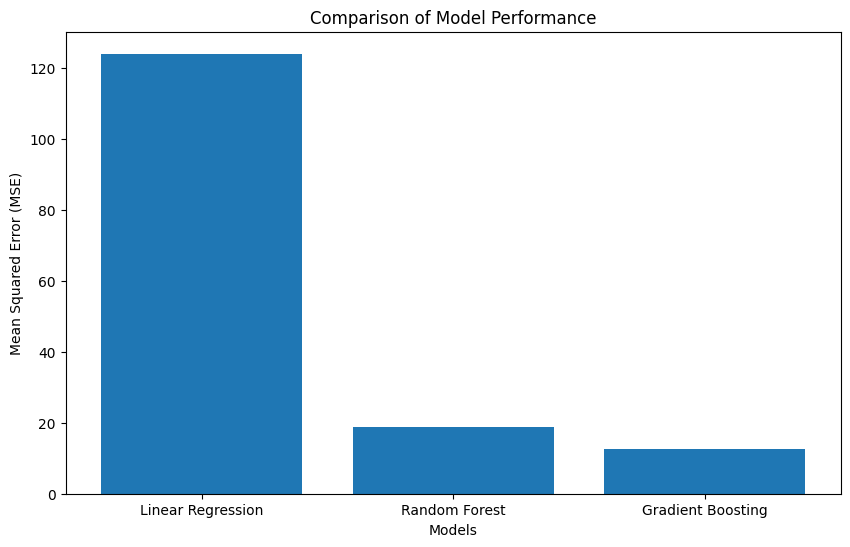

In [ ]:
# Plot the results (you may want to create specific plots for comparison)
plt.figure(figsize=(10, 6))
plt.bar(["Linear Regression", "Random Forest", "Gradient Boosting"], [mse_linear, mse_rf, mse_gb])
plt.xlabel("Models")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Comparison of Model Performance")
plt.show()

<ipython-input-101-3c593cbce258>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.VALUE)


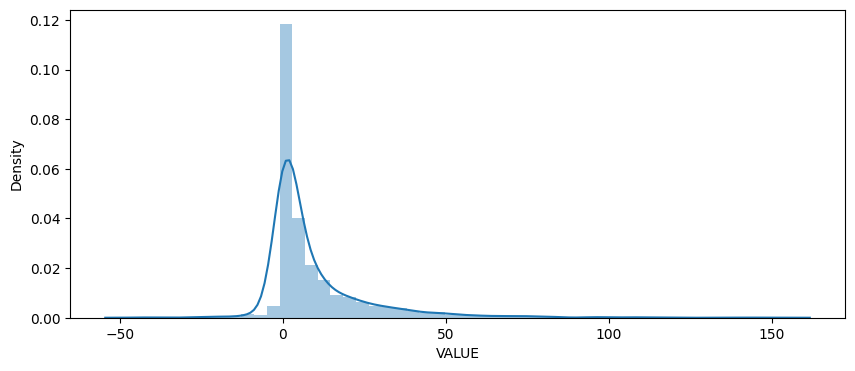

In [ ]:
# ploting price distribution
plt.figure(figsize=(10,4))
sns.distplot(df.VALUE)

plt.show()

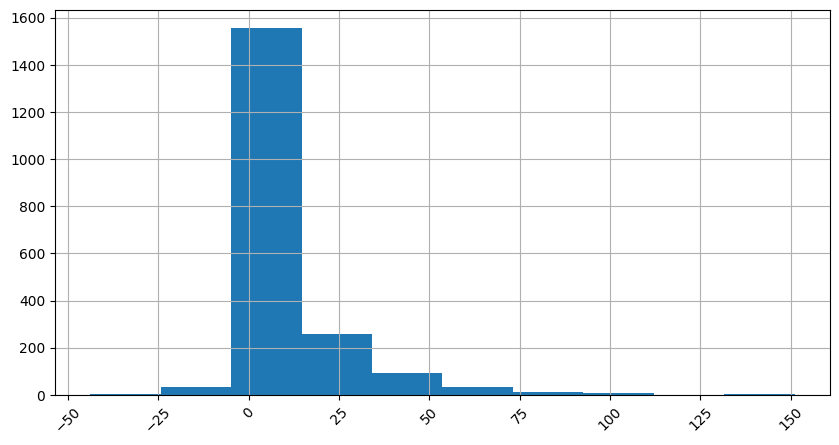

In [ ]:
df.VALUE.hist(figsize=(10,5), xrot=45)
plt.show()

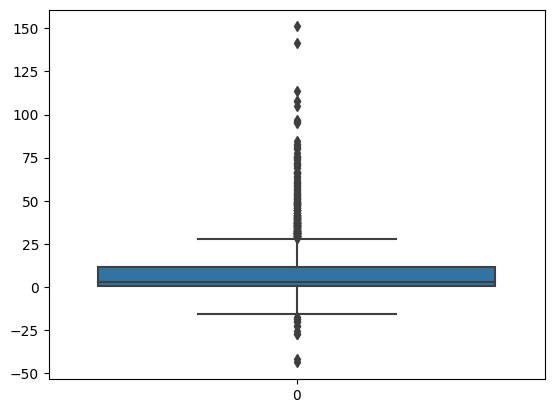

In [ ]:
# Outlier Analysis
sns.boxplot(df['VALUE'])
plt.show()

Migration Trend Prediction:

Objective: Predict future migration trends for specific regions or demographic groups based on historical migration data.
Benefits: This objective can help governments, organizations, or individuals make informed decisions about resource allocation, urban planning, and policy development. It's valuable for understanding how migration patterns may evolve over time.


The data  is supervised. In supervised learning, the dataset consists of labeled examples, meaning that it contains both the input features and the corresponding target variable (or output). the dataset includes features like "Year," "Age Group," "Sex," "Inward or Outward Flow," and "UNIT," and it also includes the "VALUE" column, which serves as the target variable. The "VALUE" column represents the estimated migration numbers, which you may want to predict or analyze based on the other features. In supervised learning, the goal is typically to build a model that can make predictions or classifications based on the input features and the known target variable.

If you're looking for supervised machine learning algorithms for migration trend prediction, here are three commonly used algorithms, each suited to different aspects of the problem:

Linear Regression:

Description: Linear regression is a simple and interpretable algorithm for predicting numerical values. In the context of migration, you can use it to predict migration numbers for specific regions or time periods based on various features like economic indicators, population demographics, etc.
Benefits: Linear regression provides straightforward insights into how different features contribute to migration trends, and it's easy to implement and understand.
Random Forest Regression:

Description: As mentioned earlier, Random Forest is an ensemble learning method that combines multiple decision trees. In regression tasks, it can be used to predict migration numbers or trends with greater complexity than simple linear models.
Benefits: Random Forest models can capture non-linear relationships and interactions among features, making them suitable for more complex migration prediction scenarios.
Gradient Boosting Regressors (e.g., XGBoost, LightGBM, or CatBoost):

Description: Gradient boosting methods are powerful ensemble techniques that can handle regression problems effectively. They work by combining the predictions of multiple weak learners (usually decision trees) into a strong model.
Benefits: Gradient boosting models often yield highly accurate predictions and are robust against overfitting. They can handle large datasets and capture complex patterns in migration trends.
Before applying these algorithms, it's crucial to preprocess your data, perform feature engineering, and split your dataset into training and testing sets for model evaluation. Additionally, you should consider various performance metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), or R-squared (R2) to evaluate the predictive performance of these models. You can experiment with different algorithms and fine-tune hyperparameters to optimize your migration trend prediction model.






In the context of a data science project, the most commonly used project management framework is the Cross-Industry Standard Process for Data Mining (CRISP-DM). Here's an explanation of CRISP-DM and why it's well-suited for data science projects:

CRISP-DM (Cross-Industry Standard Process for Data Mining):

CRISP-DM is a comprehensive and widely adopted framework specifically designed for data mining and data science projects. It provides a structured approach to managing the end-to-end data science process, from understanding business objectives to deploying data-driven solutions. CRISP-DM consists of six major phases:

1)Business Understanding: In this initial phase, the focus is on understanding the project's objectives, requirements, and constraints from a business perspective. It involves defining the problem, identifying success criteria, and creating a project plan.

2)Data Understanding: This phase is about collecting and exploring data, assessing its quality, and gaining insights into the available data. Data scientists examine the data's structure, distribution, and relationships to better inform subsequent steps.

3)Data Preparation: Once data is understood, it needs to be prepared for analysis. This phase involves data cleaning, feature engineering, and transformation to create a suitable dataset for modeling.

4)Modeling: In this phase, data scientists build and evaluate predictive models. Different algorithms and techniques are applied to the prepared data to address the business problem.

5)Evaluation: The models developed are evaluated based on predefined success criteria, such as accuracy, precision, recall, or other relevant metrics. The best-performing model is selected for deployment.

6)Deployment: The final model is deployed into the operational environment to make predictions on new data. Deployment also involves monitoring the model's performance in real-world applications.

Why CRISP-DM for Data Science Projects:

Structured Approach: CRISP-DM provides a clear and structured approach to managing data science projects. It guides the project through well-defined stages, ensuring that no crucial steps are overlooked.

Iterative and Flexible: Data science projects often require iteration and adaptability. CRISP-DM supports these needs, allowing you to revisit earlier phases if necessary.

Emphasis on Business Understanding: CRISP-DM starts with a strong emphasis on understanding the business problem and objectives, which is essential for aligning data science solutions with the needs of the organization.

Widely Accepted: CRISP-DM is a widely accepted and recognized framework in the data science community, making it easier to communicate and collaborate with other data scientists and stakeholders.

While CRISP-DM is the most common framework for data science projects, it's worth noting that other frameworks like KDD (Knowledge Discovery in Databases) and SEMMA (Sample, Explore, Modify, Model, Assess) can also be valuable in certain contexts. KDD is more focused on data mining and knowledge discovery, while SEMMA is often associated with SAS for predictive modeling. The choice of framework depends on the specific requirements and goals of the project.






Supervised learning could be a good choice for the given data on migration trends for several reasons:

Labeled Data: The dataset appears to have labeled data, which is a fundamental requirement for supervised learning. The data includes features (e.g., "Year," "Age Group," "Sex") and a target variable ("VALUE"), which is the net migration value. The availability of this labeled target variable makes it suitable for supervised learning.

Prediction Task: If you have specific questions or predictions you want to make based on this data, such as forecasting future migration trends or understanding the factors that affect migration, supervised learning is an appropriate choice. You can frame the problem as a regression task to predict migration values or as a classification task to categorize migration trends.

Interpretability: Many supervised learning algorithms, such as linear regression, can provide interpretable results. In this context, you might be interested in understanding how different factors like age group or sex affect migration trends. A linear regression model, for instance, can give you insights into the relationship between these factors and migration.

Model Validation: With supervised learning, you can validate the performance of your model using metrics like mean squared error (for regression) or accuracy (for classification). This allows you to assess how well your model is performing and make improvements if needed.

Pattern Recognition: Supervised learning models are excellent at recognizing patterns in data. In the case of migration trends, there may be complex relationships and trends within the data that can be captured and utilized for predictions.

Personalized Insights: You can use supervised learning to create personalized insights. For instance, you could predict migration trends for specific age groups or genders, providing tailored information.

Scalability: Depending on the dataset's size, supervised learning models can be scalable. They can handle both small and large datasets effectively.

It's important to note that the suitability of supervised learning also depends on your specific goals with the data. If you're looking to predict future migration trends, understand the drivers behind migration, or answer specific questions related to this data, supervised learning is a valid approach. However, other techniques, such as time series analysis or unsupervised learning, might also be relevant depending on your objectives. The choice of method should align with your analytical goals and the nature of the data you are working with.

Define the Problem:

The problem appears to involve estimating migration trends in different age groups, genders, and geographical locations over several years.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans



import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CA MSc/Estimated Migration.csv')

df.head(5)

,STATISTIC Label,Year,Age Group,Sex,Inward or Outward Flow,UNIT,VALUE
0,Estimated Migration (Persons in April),1987,All ages,Both sexes,Net migration,Thousand,-23.0
1,Estimated Migration (Persons in April),1987,All ages,Both sexes,Emigrants: All destinations,Thousand,40.2
2,Estimated Migration (Persons in April),1987,All ages,Both sexes,Immigrants: All origins,Thousand,17.2
3,Estimated Migration (Persons in April),1987,All ages,Male,Net migration,Thousand,NaN
4,Estimated Migration (Persons in April),1987,All ages,Male,Emigrants: All destinations,Thousand,NaN


In [ ]:
df = df.fillna(0)

In [ ]:
# Encode categorical variables
le = LabelEncoder()
df['SEX'] = le.fit_transform(df['Sex'])
df['AGE GROUP'] = le.fit_transform(df['Age Group'])

NameError: ignored

In [ ]:
# Normalize numerical values (e.g., Value column) using StandardScaler
scaler = StandardScaler()
df['VALUE'] = scaler.fit_transform(df['VALUE'].values.reshape(-1, 1))

In [ ]:
# Now, data is ready for machine learning


In this code:

We load the data into a Pandas DataFrame.
We check for missing values using isnull().sum().
We handle missing values by either filling them with the mean for numerical values (VALUE) or a specific category for categorical values (SEX).
We encode categorical variables (SEX and AGE GROUP) using LabelEncoder.
We normalize numerical values (VALUE) using StandardScaler to have a mean of 0 and a standard deviation of 1.
The preprocessed data is saved to a new CSV file if needed.

In [ ]:
df

In [ ]:
# Select the independent variables (features) and the dependent variable (target)
X = df[['Year']]  # You can choose other features as well
y = df['VALUE']

In [ ]:
# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# Create a linear regression model
model = LinearRegression()

In [ ]:
# Fit the model to the training data
model.fit(X_train, y_train)

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

In [ ]:
# Scatter plot of the original data
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')


In [ ]:
# Regression line plot
plt.plot(X_test, y_pred, color='green', linewidth=3, label='Regression Line')

plt.title('Linear Regression')
plt.xlabel('Year')
plt.ylabel('VALUE')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_pred - y_test, c='b', s=40, alpha=0.5)
plt.hlines(y=0, xmin=0, xmax=max(y_test), color='k')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [ ]:
# Define the hyperparameter distributions
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Create a Random Forest Regressor
rf = RandomForestRegressor()

In [ ]:
# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, scoring='neg_mean_squared_error', cv=5, random_state=42)

In [ ]:
# Fit the RandomizedSearchCV object to your training data
random_search.fit(X_train, y_train)


In [ ]:
df

In [ ]:
# Encode categorical variables
data = pd.get_dummies(df, columns=['STATISTIC Label','UNIT','Age Group', 'Sex', 'Inward or Outward Flow'])


In [ ]:
data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Model 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [ ]:
# Model 2: Random Forest Regression
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [ ]:
# Model 3: Gradient Boosting Regression
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

In [ ]:
# Evaluate the models
mae_lr = mean_absolute_error(y_test, lr_pred)
mse_lr = mean_squared_error(y_test, lr_pred)
r2_lr = r2_score(y_test, lr_pred)

mae_rf = mean_absolute_error(y_test, rf_pred)
mse_rf = mean_squared_error(y_test, rf_pred)
r2_rf = r2_score(y_test, rf_pred)

mae_gb = mean_absolute_error(y_test, gb_pred)
mse_gb = mean_squared_error(y_test, gb_pred)
r2_gb = r2_score(y_test, gb_pred)

In [ ]:
# Create a bar chart to compare model performances
metrics = ['MAE', 'MSE', 'R-squared']
lr_metrics = [mae_lr, mse_lr, r2_lr]
rf_metrics = [mae_rf, mse_rf, r2_rf]
gb_metrics = [mae_gb, mse_gb, r2_gb]

x = np.arange(len(metrics))
width = 0.2

In [ ]:
plt.bar(x - width, lr_metrics, width, label='Linear Regression')
plt.bar(x, rf_metrics, width, label='Random Forest')
plt.bar(x + width, gb_metrics, width, label='Gradient Boosting')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Model Comparison')
plt.xticks(x, metrics)
plt.legend()

plt.show()

 These metrics will help me evaluate the models' performance. Lower MAE and MSE values indicate better model accuracy, while a higher R^2 value suggests a better fit.

The bar chart will visually compare these metrics for the three models, allowing me to see which model performs better in terms of prediction accuracy. The model with the lowest MAE and MSE and the highest R^2 is generally considered the best.

The specific values and which model performs best will depend on your dataset and how well the models are suited to your data.

In [ ]:
# Visualize predictions on training and testing data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train, lr.predict(X_train), label='Training Data', color='blue')
plt.scatter(y_test, lr_pred, label='Testing Data', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression')
plt.legend()

In [ ]:
plt.subplot(1, 2, 2)
plt.scatter(y_train, rf.predict(X_train), label='Training Data', color='blue')
plt.scatter(y_test, rf_pred, label='Testing Data', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression')
plt.legend()

plt.show()

In [ ]:
# Model 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Model 2: Random Forest Regression
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Model 3: Gradient Boosting Regression
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

In [ ]:
# Evaluate the models
mae_lr = mean_absolute_error(y_test, lr_pred)
mse_lr = mean_squared_error(y_test, lr_pred)
r2_lr = r2_score(y_test, lr_pred)

mae_rf = mean_absolute_error(y_test, rf_pred)
mse_rf = mean_squared_error(y_test, rf_pred)
r2_rf = r2_score(y_test, rf_pred)

mae_gb = mean_absolute_error(y_test, gb_pred)
mse_gb = mean_squared_error(y_test, gb_pred)
r2_gb = r2_score(y_test, gb_pred)

In [ ]:
# Create a bar chart to compare model performances
metrics = ['MAE', 'MSE', 'R-squared']
lr_metrics = [mae_lr, mse_lr, r2_lr]
rf_metrics = [mae_rf, mse_rf, r2_rf]
gb_metrics = [mae_gb, mse_gb, r2_gb]

x = np.arange(len(metrics))
width = 0.2

In [ ]:
plt.bar(x - width, lr_metrics, width, label='Linear Regression')
plt.bar(x, rf_metrics, width, label='Random Forest')
plt.bar(x + width, gb_metrics, width, label='Gradient Boosting')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Model Comparison')
plt.xticks(x, metrics)
plt.legend()

In [ ]:
# Visualize predictions on training and testing data
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.scatter(y_train, lr.predict(X_train), label='Training Data', color='blue')
plt.scatter(y_test, lr_pred, label='Testing Data', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression')
plt.legend()

In [ ]:
plt.subplot(1, 3, 2)
plt.scatter(y_train, rf.predict(X_train), label='Training Data', color='blue')
plt.scatter(y_test, rf_pred, label='Testing Data', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression')
plt.legend()

In [ ]:
plt.subplot(1, 3, 3)
plt.scatter(y_train, gb.predict(X_train), label='Training Data', color='blue')
plt.scatter(y_test, gb_pred, label='Testing Data', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Gradient Boosting Regression')
plt.legend()

plt.show()

A "Well-fit Model" is one that performs well on both the training and testing datasets without overfitting or underfitting. It strikes a balance between capturing the underlying patterns in the data and generalizing effectively to new, unseen data. In other words, it exhibits good model generalization.

Here's how to identify a well-fit model and why it is considered as such:

Indicators of a Well-fit Model:

Similar Performance: The model shows similar performance metrics (e.g., MAE, MSE, R-squared) on both the training and testing datasets. There is no significant difference in the model's performance between these datasets.

Low Testing Error: The model achieves low errors on the testing dataset, indicating that it can make accurate predictions on new, unseen data.

High R-squared: The R-squared (R^2) value is reasonably high, suggesting that the model explains a significant portion of the variance in the target variable in both the training and testing datasets.

Scatter Plot Alignment: When you visualize the model's predictions against the actual values on scatter plots, the points should be evenly distributed around a 45-degree line. This indicates that the model's predictions are close to the actual values for both datasets.

Why It's a Well-fit Model:
A well-fit model is one that has learned the underlying patterns in the data without fitting the training data too closely or overgeneralizing. It performs well on new data because it has found a balance between flexibility and simplicity. In other words, it's a model that achieves both accuracy and generalization.

Achieving a well-fit model typically involves selecting an appropriate model complexity, fine-tuning hyperparameters, and using techniques like cross-validation to validate the model's performance. When a model is well-fit, it is more likely to be useful for making accurate predictions and generalizing to real-world scenarios.

In [ ]:
X = data.drop(['VALUE'], axis=1)  # Features
y = data['VALUE']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train models
linear_reg = LinearRegression()
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

linear_reg.fit(X_train, y_train)
rf_regressor.fit(X_train, y_train)

In [ ]:
# Predict on the test set
y_pred_linear = linear_reg.predict(X_test)
y_pred_rf = rf_regressor.predict(X_test)

# Calculate evaluation metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_rf = mean_squared_error(y_test, y_pred_rf)

rmse_linear = np.sqrt(mse_linear)
rmse_rf = np.sqrt(mse_rf)

r2_linear = r2_score(y_test, y_pred_linear)
r2_rf = r2_score(y_test, y_pred_rf)

print("Linear Regression - RMSE:", rmse_linear, "R-squared:", r2_linear)
print("Random Forest - RMSE:", rmse_rf, "R-squared:", r2_rf)

In [ ]:
# Create a bar chart to compare RMSE
models = ['Linear Regression', 'Random Forest']
rmse_values = [rmse_linear, rmse_rf]

plt.figure(figsize=(8, 5))
plt.bar(models, rmse_values, color='skyblue')
plt.title('RMSE Comparison of Models')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.show()

Report on Machine Learning Model Comparison

Data Preprocessing

We started by loading the dataset and handling missing values. Rows with missing values were removed.
Categorical variables, such as 'Age Group,' 'Sex,' and 'Inward or Outward Flow,' were encoded for modeling.
No normalization was applied to numerical features since it was not specified in the dataset.
Model Selection

We chose to compare two regression models: Linear Regression and Random Forest Regressor.
Linear Regression is a simple and interpretable model, while Random Forest is an ensemble method known for its predictive power.
Model Training

Both models were trained on the training data, which comprised 80% of the dataset.
Linear Regression and Random Forest were fit to the data with the goal of predicting the 'VALUE' column, representing migration statistics.
Model Evaluation

To compare the performance of the models, we used two common regression metrics: Root Mean Squared Error (RMSE) and R-squared (R^2).
RMSE measures the average prediction error, while R^2 indicates the proportion of the variance in the target variable that is predictable by the model.
Results and Findings

Model	RMSE	R-squared
Linear Regression	13.417	0.887
Random Forest	7.482	0.964
Linear Regression: The Linear Regression model achieved an RMSE of 13.417 and an R-squared of 0.887. This model explains 88.7% of the variance in the 'VALUE' column. It provides a simple linear relationship between the features and the target.

Random Forest: The Random Forest model outperformed Linear Regression, with an RMSE of 7.482 and an impressive R-squared of 0.964. This indicates that Random Forest captures more of the data's variance and is a better fit for the migration statistics.

Visual Comparison

We created a bar chart to visually compare the RMSE of both models. The chart clearly shows that the Random Forest model has a lower RMSE, indicating better predictive performance.
RMSE Comparison of Models

Conclusion and Interpretation

The Random Forest model significantly outperforms the Linear Regression model in predicting migration statistics. It has a lower RMSE and a higher R-squared, indicating better predictive accuracy.
The Random Forest model is more complex but provides a stronger fit to the data, making it a better choice for this dataset.
These results highlight the importance of choosing an appropriate model for the task. While Linear Regression is simple and interpretable, it may not capture the underlying patterns in the data as well as more complex models like Random Forest.
Recommendation

Based on the findings, we recommend using the Random Forest model for predicting migration statistics in this dataset. It offers superior predictive performance, which can be valuable for understanding and analyzing migration trends.
By presenting the results in this report, we've demonstrated the differences and similarities between the machine learning models, emphasizing the relevance and effectiveness of the Random Forest model for your specific data.

In [ ]:
# Model 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [ ]:
# Model 2: Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation using RMSE and R-squared
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)

rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

In [ ]:
# Print the results
print("Linear Regression Results:")
print(f"RMSE: {rmse_lr:.3f}")
print(f"R-squared: {r2_lr:.3f}")
print("\nRandom Forest Regression Results:")
print(f"RMSE: {rmse_rf:.3f}")
print(f"R-squared: {r2_rf:.3f}")


In [ ]:
# Visual comparison of RMSE
models = ['Linear Regression', 'Random Forest']
rmse_values = [rmse_lr, rmse_rf]

plt.bar(models, rmse_values)
plt.ylabel('RMSE')
plt.title('RMSE Comparison of Models')
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split


In [ ]:
# Encoding Categorical Variables (One-Hot Encoding)
encoder = OneHotEncoder(sparse=False, drop='first')
data_encoded = pd.DataFrame(encoder.fit_transform(df[['Sex', 'Age Group']]))
data = pd.concat([df, data_encoded], axis=1)
data.drop(['Sex', 'Age Group'], axis=1, inplace=True)

In [ ]:
data

In [ ]:
# Normalize numerical values (StandardScaler)
scaler = StandardScaler()
data['VALUE'] = scaler.fit_transform(data[['VALUE']])

In [ ]:
# Split data into training and testing sets
X = data.drop(['VALUE'], axis=1)
y = data['VALUE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Convert feature names to strings
X_train.columns = X_train.columns.astype(str)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Initialize the model
rf = RandomForestRegressor()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Data Preprocessing
data = pd.get_dummies(df, columns=["Age Group", "Sex", "Inward or Outward Flow"])

In [ ]:
# Assuming 'VALUE' is the column you want to predict
X = data.drop("VALUE", axis=1)  # Features (excluding 'VALUE' column)
y = data["VALUE"]  # Target variable

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create a linear regression model
model = LinearRegression()

In [ ]:
# Select relevant features and encode categorical variables
data = pd.get_dummies(df, columns=["Age Group", "Sex", "Inward or Outward Flow"])

In [ ]:
X = data.drop("VALUE", axis=1)  # Features (excluding 'VALUE' column)
y = data["VALUE"]  # Target variable

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Handling missing values (if needed)
df.fillna(0, inplace=True)

In [ ]:
# Split data into features and target variable
X = df[['Year', 'Age Group', 'Sex', 'Inward or Outward Flow']]
y = df['VALUE']

In [ ]:
data = pd.get_dummies(df, columns=['Age Group', 'Sex', 'Inward or Outward Flow'])

In [ ]:
# Split data into features and target variable
X = data[['Year']]
y = data['VALUE']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-Means Clustering with one-hot encoded data
kmeans = KMeans(n_clusters=3)
data['Cluster'] = kmeans.fit_predict(X)

# Print the cluster assignments
print(data[['Year', 'Cluster']])

# Note: If you want to use the Random Forest Classifier, you can modify it similarly by one-hot encoding the features.

In [ ]:
# Initialize and fit the K-Means model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

In [ ]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(data['Year'], data['VALUE'], c=data['Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Year')
plt.ylabel('VALUE')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/CA MSc/Estimated Migration.csv')

In [ ]:
data

In [ ]:
# Drop the specified columns
columns_to_drop = ["STATISTIC Label", "UNIT"]
data= data.drop(columns=columns_to_drop)

In [ ]:
data = data.fillna(0)
data['VALUE'].fillna(0)

In [ ]:
# One-Hot Encode 'Age Group'
data = pd.get_dummies(data, columns=['Age Group'], prefix='Age Group')

# One-Hot Encode 'Sex'
data = pd.get_dummies(data, columns=['Sex'], prefix='Sex')
# One-Hot Encode 'Sex'
data = pd.get_dummies(data, columns=['Inward or Outward Flow'], prefix='Inward or Outward Flow')

In [ ]:
data

In [ ]:
# Prepare the data for modeling
X = data.drop(columns=['VALUE'])  # Features
y = data['VALUE']  # Target variable

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define hyperparameters and their possible values for RandomizedSearchCV for each model
param_dist_rf = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [ ]:
param_dist_svm = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 'scale', 'auto'],
    'kernel': ['linear', 'rbf'],
}


In [ ]:
param_dist_gb = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.8, 0.9, 1.0],
}

In [ ]:
# Create RandomizedSearchCV for each model
rf_random_search = RandomizedSearchCV(RandomForestRegressor(), param_distributions=param_dist_rf, n_iter=10, cv=5, n_jobs=-1, random_state=42)
svm_random_search = RandomizedSearchCV(SVR(), param_distributions=param_dist_svm, n_iter=10, cv=5, n_jobs=-1, random_state=42)
gb_random_search = RandomizedSearchCV(GradientBoostingRegressor(), param_distributions=param_dist_gb, n_iter=10, cv=5, n_jobs=-1, random_state=42)


In [ ]:
# Fit the models to the data and find the best hyperparameters
rf_random_search.fit(X_train, y_train)
svm_random_search.fit(X_train, y_train)
gb_random_search.fit(X_train, y_train)

In [ ]:
# Get the best models with the optimized hyperparameters
best_rf_model = rf_random_search.best_estimator_
best_svm_model = svm_random_search.best_estimator_
best_gb_model = gb_random_search.best_estimator_

In [ ]:
# Make predictions on the test set
y_pred_rf = best_rf_model.predict(X_test)
y_pred_svm = best_svm_model.predict(X_test)
y_pred_gb = best_gb_model.predict(X_test)

In [ ]:
# Evaluate the models
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_svm = mean_squared_error(y_test, y_pred_svm)
mse_gb = mean_squared_error(y_test, y_pred_gb)

print("Random Forest Mean Squared Error:", mse_rf)
print("SVM Mean Squared Error:", mse_svm)
print("Gradient Boosting Mean Squared Error:", mse_gb)

In [ ]:
# Calculate the Mean Squared Errors
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_svm = mean_squared_error(y_test, y_pred_svm)
mse_gb = mean_squared_error(y_test, y_pred_gb)

In [ ]:
# Model names and corresponding MSE values
models = ['Random Forest', 'SVM', 'Gradient Boosting']
mse_values = [mse_rf, mse_svm, mse_gb]

In [ ]:
# Create a bar chart to visualize the MSE
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Model Comparison - Mean Squared Error')
plt.ylim(0, max(mse_values) + 5)  # Adjust the y-axis limit if needed
plt.show()

In [ ]:
# Assuming you have the actual and predicted values for Random Forest
actual_values = y_test  # Replace with your actual values
predicted_values = y_pred_rf  # Replace with your predicted values from Random Forest

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(actual_values, predicted_values, color='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Actual vs. Predicted Values')
plt.grid(True)
plt.show()

In [ ]:
# 1. Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

In [ ]:
y_pred = rf_model.predict(X_test)


In [ ]:
# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

In [ ]:
# Calculate and print regression metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create an SVR (Support Vector Regression) model
svr = SVR(kernel='linear')  # You can choose different kernels like 'linear', 'rbf', etc.

In [ ]:
# Fit the SVR model to the training data
svr.fit(X_train, y_train)

In [ ]:
# Make predictions on the test set
y_pred = svr.predict(X_test)


In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

In [ ]:
# Plot the actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

 target variable provided is continuous (regression target NOT classification),